Link to the live webpage: https://sjesusa1.github.io/
## Final Tutorial - Factors of Song Popularity 

### Sara Jesusa

### Data Sources
1. Top Spotify Songs (2010 - 2019): https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year
2. 100 Top Tracks of 2019 from BillBoard: https://www.kaggle.com/afirium/top-100-tracks-of-2019
3. Data on Songs from Billboard(1999 - 2019)
https://www.kaggle.com/danield2255/data-on-songs-from-billboard-19992019

### Further Sources 
https://developer.spotify.com/documentation/web-api/reference/tracks/get-several-audio-features/

### Project Plan
On January 4, 1936, Billboard magazine published its first list of the most popular songs based on their sales, radio airplay, digital downloading and online streaming, such as YouTube.  Each week since then, Billboard magazine has been charting the popularity of the top 100 songs in the U.S.. Similarly, Spotify, one of the leading music streaming apps of today, also compiles a yearly list of top songs based on the number of times the song was streamed by the user. 

With the pressure to make it into the top hits, record companies try to create music that might appeal to a large audience; however, it is difficult to understand what certain aspects of a song makes it a top hit. 

For this project, I will be providing a data science analysis on data sets of top songs collected by Billboard and Spotify from various years to find different correlates of successful songs in order to determine what key qualities a song needs to become a hit.  

### Exploring the Data:
This project will help understand how audio features play a role in the popularity of a song. The data set present can be used to find the correlation between audio features and song popularity by plotting the audio features vs. song popularity and using data visualization.
1. What common characteristics do popular songs share?
2. Are male artists featured more that women in popular songs? 
3. What is the most prominent genre?

### Tools Needed 
Python libraries:
    1. Data Analysis Libraries: numpy, pandas
    2. Visualization Libraries: matplotlib.pyplot, seaborn

#### Importing Necessary Libraries and Setting up Environment:

In [1]:
#data analysis libraries 
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Processing: Extraction, Transform, and Load
#### Extraction 
I found the data that I needed was already provided in a dataset on Kaggle as "Top Spotify songs from 2010-2019 - BY YEAR" by Leonardo Henrique. I checked the data and found that it was already tidy and no validation errors. The dataset was extracted from Spotify and Billboard and organized by Spotify Organize Your Music: http://organizeyourmusic.playlistmachinery.com/. The data set included my target variable, the popularity score of each song, and explanatory variables, audio features, which include beats per minute (BPM), danceability, loudness, energy, valence, and duration. It also included general characteristics, such as the genre, the title, the artists, and the year the song was released. 

#### Load

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Show a ludicrus number of rows and columns
pd.options.display.max_rows = 500
pd.options.display.max_columns = 500
pd.options.display.width = 1000

In [3]:
#Artist dataset 
artist_df = pd.read_csv("../data/artistDf.csv")

#Dropping unnecessary columns 
artist_df = artist_df.drop(artist_df.columns[[0,4,5]], axis = 1)
artist_df.head()

,Artist,Followers,Genres,Gender,Group.Solo
0,Ed Sheeran,52698756,"pop,uk pop",M,Solo
1,Justin Bieber,30711450,"canadian pop,dance pop,pop,post-teen pop",M,Solo
2,Jonas Brothers,3069527,"boy band,dance pop,pop,post-teen pop",M,Group
3,Drake,41420478,"canadian hip hop,canadian pop,hip hop,pop rap,...",M,Solo
4,Chris Brown,9676862,"dance pop,pop,pop rap,r&b,rap",M,Solo


In [4]:
#Top Spotify Songs 2010-2019
spotify_df = pd.read_csv("../data/top10s.csv")

#Dropping first column 
spotify_df = spotify_df.drop(spotify_df.columns[0], axis = 1)

#Renaming columns 
spotify_df.columns = ['Title', 'Artist', 'Top Genre', 'Year', 'BPM', 'Energy', 'Dance', 'dB', 'Liveness', 'Valence', 'Duration', 'Acoustic', 'Speech', 'Popularity']

spotify_df.head()

,Title,Artist,Top Genre,Year,BPM,Energy,Dance,dB,Liveness,Valence,Duration,Acoustic,Speech,Popularity
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [5]:
#Top 100 Billboard 2019 Songs 
bb100 = pd.read_csv("../data/track_analyze.csv")
bb100.head()

,Track,Artist,Danceability,Energy,Key,Loudness,Liveness,Speechiness,Instrumentalness,Acousticness,Mode,Valence,BPM
0,Old Town Road - Remix ...,Lil Nas X,0.878,0.619,6,-5.560,0.1130,0.1020,0.000000,0.0533,1,0.639,136.041
1,Sunflower - Spider-Man: Into the Spider-Verse ...,Post Malone,0.760,0.479,2,-5.574,0.0703,0.0466,0.000000,0.5560,1,0.913,89.911
2,Without Me ...,Halsey,0.752,0.488,6,-7.050,0.0936,0.0705,0.000009,0.2970,1,0.533,136.041
3,bad guy ...,Billie Eilish,0.701,0.425,7,-10.965,0.1000,0.3750,0.130000,0.3280,1,0.562,135.128
4,Wow. ...,Post Malone,0.829,0.539,11,-7.359,0.1030,0.2080,0.000002,0.1360,0,0.388,99.960


In [6]:
import datetime

bbHot = pd.read_csv("../data/billboardHot100_1999-2019.csv")

#Drop unnecessary columns 
bbHot = bbHot.drop(bbHot.columns[[0, 4, 5, 9, 11]], axis = 1)

#Change week and date objects to datetime objects 
week = pd.to_datetime(bbHot["Week"])
song_release = pd.to_datetime(bbHot["Date"])
bbHot["Week"] = week
bbHot["Date"] = song_release
bbHot["Year"] = pd.DatetimeIndex(bbHot["Date"]).year

#Filter songs from 2010-2019
bbHot = bbHot.loc[bbHot['Year'] >= 2010.0]

#Tidying dataset 
bbHot.columns = ['Artist', 'Track', 'Weekly Rank', 'Week', 'Date', 'Genre', 'Lyrics', 'Year']
bbHot = bbHot.sort_values(ascending = True, by = ['Artist', 'Track', 'Weekly Rank', 'Week', 'Date', 'Genre','Lyrics', 'Year'])
bbHot.head()

,Artist,Track,Weekly Rank,Week,Date,Genre,Lyrics,Year
24590,"""Weird Al"" Yankovic",Word Crimes,39,2014-08-01,2014-07-15,"Parody,Comedy,Pop",Word Crimes \nEverybody shut up! Woo!\nEveryon...,2014.0
24543,"""Weird Al"" Yankovic",Word Crimes,91,2014-08-08,2014-07-15,"Parody,Comedy,Pop",Word Crimes \nEverybody shut up! Woo!\nEveryon...,2014.0
4535,17,NC,41,2018-08-18,2018-08-03,"Trap,Rap","NC-17 \nOoh\nMe and my bitch, I swear we like ...",2018.0
10232,2 Chainz,4 AM,55,2017-07-08,2017-05-30,"Atlanta,Trap,Rap","4 AM \nYeah, yeah, yeah\nM-M-M-Murda\nYeah, ye...",2017.0
10137,2 Chainz,4 AM,59,2017-07-15,2017-05-30,"Atlanta,Trap,Rap","4 AM \nYeah, yeah, yeah\nM-M-M-Murda\nYeah, ye...",2017.0


### Exploratory Data Analysis(EDA) and  Data Visualization

#### Question: What common characteristics do popular songs share?
##### 1. Beats Per Minute (BPM)
   The first numerical variable I will look at is Beats per minute (BPM), which is the tempo or the pace of the song during the duraction of the song. For example, 60 BPM means a beat per second, while 120 BPM is twice as fast with two beats per second. 

Text(0.5,0,'BPM Ranges')

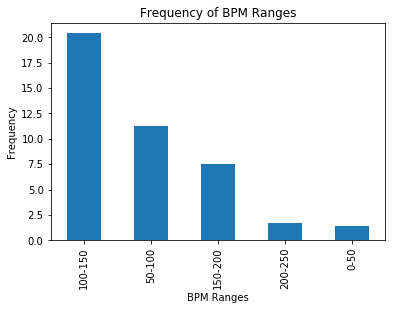

In [7]:
bpm_df = spotify_df

#Creating BPM Bins 
bpm_bins = [0, 50, 100, 150, 200, 250]
bin_names = ['0-50', '50-100', '100-150', '150-200', '200-250']
bpm_df['BPM Range'] = pd.cut(bpm_df['BPM'], bpm_bins, right = False, labels = bin_names)
(bpm_df['BPM Range'].value_counts() ** .5).plot.bar()
plt.title("Frequency of BPM Ranges")
plt.ylabel("Frequency")
plt.xlabel("BPM Ranges")

Based on the graph above, majority of the popular songs contain a BPM within 100-150 and the least being 0-50 BPM.

In [8]:
#Songs with a BPM of 100-150
bpm_df.loc[bpm_df['BPM Range'] == '100-150'].head()

,Title,Artist,Top Genre,Year,BPM,Energy,Dance,dB,Liveness,Valence,Duration,Acoustic,Speech,Popularity,BPM Range
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80,100-150
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79,100-150
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78,100-150
6,Dynamite,Taio Cruz,dance pop,2010,120,78,75,-4,4,82,203,0,9,77,100-150
7,Secrets,OneRepublic,dance pop,2010,148,76,52,-6,12,38,225,7,4,77,100-150


In [9]:
#Songs with BPM of 0-50
bpm_df.loc[bpm_df['BPM Range'] == '0-50'].head()

,Title,Artist,Top Genre,Year,BPM,Energy,Dance,dB,Liveness,Valence,Duration,Acoustic,Speech,Popularity,BPM Range
44,You Lost Me,Christina Aguilera,dance pop,2010,43,39,23,-6,14,7,257,85,4,56,0-50
442,Million Years Ago,Adele,british soul,2016,0,0,0,-60,0,0,227,0,0,0,0-50


##### 2. Energy
   The second numerical variable I will look at is energy. The higher the value, the more energetic the song is. Energetic songs are usually described with the general feeling of being fast, loud, and noisy. Musical energy can be related to the volume or intensity of the song. 

Text(0.5,0,'Energy Ranges')

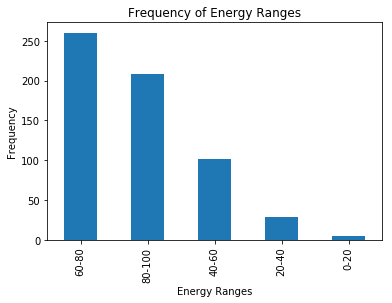

In [10]:
energy_df = spotify_df

eng_bins = [0, 20, 40, 60, 80, 100]
bin_names = ['0-20', '20-40', '40-60', '60-80', '80-100']
energy_df['Energy Range'] = pd.cut(energy_df['Energy'], eng_bins, right = False, labels = bin_names)
(energy_df['Energy Range'].value_counts() ** 1).plot.bar()
plt.title("Frequency of Energy Ranges")
plt.ylabel("Frequency")
plt.xlabel("Energy Ranges")

Majority of popular songs contain an energy level of 60-80 while the least contain an energy level of 0-20. 

In [11]:
#Songs with Energy levels of 60-80
energy_df.loc[energy_df['Energy Range'] == '60-80'].head()

,Title,Artist,Top Genre,Year,BPM,Energy,Dance,dB,Liveness,Valence,Duration,Acoustic,Speech,Popularity,BPM Range,Energy Range
6,Dynamite,Taio Cruz,dance pop,2010,120,78,75,-4,4,82,203,0,9,77,100-150,60-80
7,Secrets,OneRepublic,dance pop,2010,148,76,52,-6,12,38,225,7,4,77,100-150,60-80
9,Only Girl (In The World),Rihanna,barbadian pop,2010,126,72,79,-4,7,61,235,13,4,73,100-150,60-80
15,OMG (feat. will.i.am),Usher,atl hip hop,2010,130,75,78,-6,36,33,269,20,3,72,100-150,60-80
16,Eenie Meenie,Sean Kingston,dance pop,2010,121,61,72,-4,11,83,202,5,3,71,100-150,60-80


In [12]:
#Songs with Energy levels of 0-50
energy_df.loc[energy_df['Energy Range'] == '0-20']

,Title,Artist,Top Genre,Year,BPM,Energy,Dance,dB,Liveness,Valence,Duration,Acoustic,Speech,Popularity,BPM Range,Energy Range
249,Say Something,A Great Big World,neo mellow,2014,138,15,45,-9,9,9,229,87,3,61,100-150,0-20
255,Not About Angels,Birdy,neo mellow,2014,116,14,41,-10,9,23,190,97,4,56,100-150,0-20
431,Start,John Legend,neo mellow,2016,110,4,52,-15,9,26,310,99,4,47,100-150,0-20
436,Beautiful Birds (feat. Birdy),Passenger,folk-pop,2016,86,17,39,-13,11,14,214,91,3,36,50-100,0-20
442,Million Years Ago,Adele,british soul,2016,0,0,0,-60,0,0,227,0,0,0,0-50,0-20


##### 3. Danceability
   The third numerical variable I will look at is danceability. Danceability describes how suitable a track is for dancing based on a combination of musical elements, which include tempo, rhytm stability, and beat strength. The higher the value, the more danceable the track is. 

##### 4. Decibals (dB)
   The fourth numerical variable I will look at is deciblas (dB). Decibals is a relative unit of measurement for sounds. To get an idea of decibals, a whisper is about 30 dB, a normal conversation is about 60 dB, and a motorcycle engine is about 95 dB. 

Text(0.5,0,'Decibals (dB)')

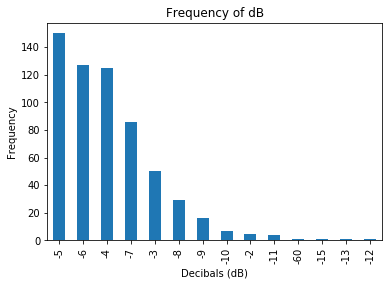

In [13]:
db_df = spotify_df
(db_df.dB.value_counts() ** 1).plot.bar()
plt.title("Frequency of dB")
plt.ylabel("Frequency")
plt.xlabel("Decibals (dB)")

Majority of the popular songs contain a dB of -5. As we can see from the graph, popular songs that contain a decibal lower than -5 db are less frequent, as well as songs louder than -5 dB. Therefore, people are more drawn to songs that are louder but to a certain extent. 

In [14]:
#Songs with a dB of -5 
db_df.loc[db_df['dB'] == -5].head()

,Title,Artist,Top Genre,Year,BPM,Energy,Dance,dB,Liveness,Valence,Duration,Acoustic,Speech,Popularity,BPM Range,Energy Range
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82,50-100,80-100
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78,100-150,80-100
5,Baby,Justin Bieber,canadian pop,2010,65,86,73,-5,11,54,214,4,14,77,50-100,80-100
11,Marry You,Bruno Mars,pop,2010,145,83,62,-5,10,48,230,33,4,73,100-150,80-100
12,Cooler Than Me - Single Mix,Mike Posner,dance pop,2010,130,82,77,-5,70,63,213,18,5,73,100-150,80-100


In [15]:
#Songs higher than -5 dB
db_df.loc[db_df['dB'] > -5].head()

,Title,Artist,Top Genre,Year,BPM,Energy,Dance,dB,Liveness,Valence,Duration,Acoustic,Speech,Popularity,BPM Range,Energy Range
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83,50-100,80-100
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80,100-150,80-100
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79,100-150,80-100
6,Dynamite,Taio Cruz,dance pop,2010,120,78,75,-4,4,82,203,0,9,77,100-150,60-80
9,Only Girl (In The World),Rihanna,barbadian pop,2010,126,72,79,-4,7,61,235,13,4,73,100-150,60-80


In [16]:
#Songs lower than -5 dB
db_df.loc[db_df['dB'] <= - 11]

,Title,Artist,Top Genre,Year,BPM,Energy,Dance,dB,Liveness,Valence,Duration,Acoustic,Speech,Popularity,BPM Range,Energy Range
207,Foolish Games,Jewel,alaska indie,2013,132,34,51,-11,12,7,250,23,3,36,100-150,20-40
241,Partition,Beyonc�,dance pop,2014,186,44,41,-12,31,17,319,3,29,65,150-200,40-60
329,What Do You Mean? - Acoustic,Justin Bieber,canadian pop,2015,125,36,77,-11,10,76,204,79,4,64,100-150,20-40
352,St Jude,Florence + The Machine,art pop,2015,117,43,26,-11,11,9,225,75,3,47,100-150,40-60
431,Start,John Legend,neo mellow,2016,110,4,52,-15,9,26,310,99,4,47,100-150,0-20
436,Beautiful Birds (feat. Birdy),Passenger,folk-pop,2016,86,17,39,-13,11,14,214,91,3,36,50-100,0-20
442,Million Years Ago,Adele,british soul,2016,0,0,0,-60,0,0,227,0,0,0,0-50,0-20
471,Love,Lana Del Rey,art pop,2017,99,37,53,-11,11,23,273,49,3,72,50-100,20-40


##### 5. Liveness 
   The fifth numerical variable I will look at is liveness. Liveness detects the presence of an audience in the recording. The higher the value, the more likely the song was performed live. 

Text(0.5,0,'Liveness Ranges')

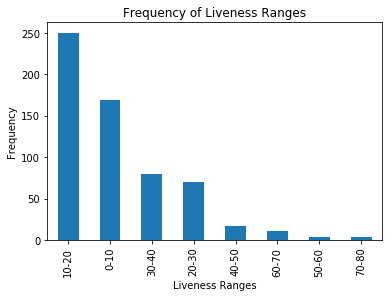

In [17]:
liv_df = spotify_df
liv_df.Liveness.value_counts().sort_index(ascending = False)
liv_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
bin_names = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
liv_df['Liveness Range'] = pd.cut(liv_df['Liveness'], liv_bins, right = False, labels = bin_names)
(energy_df['Liveness Range'].value_counts() ** 1).plot.bar()
plt.title("Frequency of Liveness Ranges")
plt.ylabel("Frequency")
plt.xlabel("Liveness Ranges")

Majority of the popular songs contain a liveness of 10-20, meaning that most people preferred songs that were not live recordings. Many people probably preferred studio recorded songs than live recordings, as studio recorded songs can be edited to produce more unique sounds not found in live recordings. 

In [18]:
#Songs with a liveness range of 10-20
liv_df.loc[liv_df['Liveness Range'] == '10-20'].head()

,Title,Artist,Top Genre,Year,BPM,Energy,Dance,dB,Liveness,Valence,Duration,Acoustic,Speech,Popularity,BPM Range,Energy Range,Liveness Range
5,Baby,Justin Bieber,canadian pop,2010,65,86,73,-5,11,54,214,4,14,77,50-100,80-100,10-20
7,Secrets,OneRepublic,dance pop,2010,148,76,52,-6,12,38,225,7,4,77,100-150,60-80,10-20
8,Empire State of Mind (Part II) Broken Down,Alicia Keys,hip pop,2010,93,37,48,-8,12,14,216,74,3,76,50-100,20-40,10-20
11,Marry You,Bruno Mars,pop,2010,145,83,62,-5,10,48,230,33,4,73,100-150,80-100,10-20
13,Telephone,Lady Gaga,dance pop,2010,122,83,83,-6,11,71,221,1,4,73,100-150,80-100,10-20


In [19]:
#Songs with a liveness range of 70-80
liv_df.loc[liv_df['Liveness Range'] == '70-80']

,Title,Artist,Top Genre,Year,BPM,Energy,Dance,dB,Liveness,Valence,Duration,Acoustic,Speech,Popularity,BPM Range,Energy Range,Liveness Range
12,Cooler Than Me - Single Mix,Mike Posner,dance pop,2010,130,82,77,-5,70,63,213,18,5,73,100-150,80-100,70-80
400,NO,Meghan Trainor,dance pop,2016,92,80,56,-4,74,65,214,1,22,70,50-100,80-100,70-80
581,Good as Hell (feat. Ariana Grande) - Remix,Lizzo,escape room,2019,96,89,67,-3,74,48,159,30,6,90,50-100,80-100,70-80


##### 6. Valence 
   The sixth numerical variable I will look at is valence. Higher values are associated with more positive moods for the song, while lower is more negative. 

Text(0.5,0,'Valence Ranges')

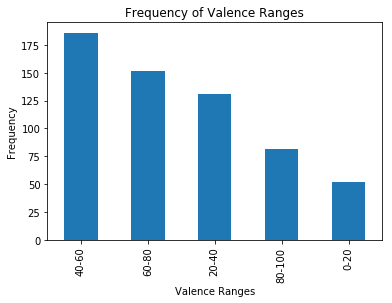

In [20]:
val_df = spotify_df
val_bins = [0, 20, 40, 60, 80, 100]
bin_names = ['0-20', '20-40', '40-60', '60-80', '80-100']
val_df['Valence Range'] = pd.cut(val_df['Valence'], val_bins, right = False, labels = bin_names)
(val_df['Valence Range'].value_counts() ** 1).plot.bar()
plt.title("Frequency of Valence Ranges")
plt.ylabel("Frequency")
plt.xlabel("Valence Ranges")

Majority of popular songs contain a valence in the range of 40-60, while the least are in 0-20. 

In [21]:
#Songs with valence of 40-60
val_df.loc[val_df["Valence Range"] == '40-60'].head()

,Title,Artist,Top Genre,Year,BPM,Energy,Dance,dB,Liveness,Valence,Duration,Acoustic,Speech,Popularity,BPM Range,Energy Range,Liveness Range,Valence Range
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78,100-150,80-100,0-10,40-60
5,Baby,Justin Bieber,canadian pop,2010,65,86,73,-5,11,54,214,4,14,77,50-100,80-100,10-20,40-60
10,Club Can't Handle Me (feat. David Guetta),Flo Rida,dance pop,2010,128,87,62,-4,6,47,235,3,3,73,100-150,80-100,0-10,40-60
11,Marry You,Bruno Mars,pop,2010,145,83,62,-5,10,48,230,33,4,73,100-150,80-100,10-20,40-60
17,The Time (Dirty Bit),The Black Eyed Peas,dance pop,2010,128,81,82,-8,60,44,308,7,7,70,100-150,80-100,60-70,40-60


In [22]:
#Songs with valence of 0-20
val_df.loc[val_df["Valence Range"] == '0-20'].head()

,Title,Artist,Top Genre,Year,BPM,Energy,Dance,dB,Liveness,Valence,Duration,Acoustic,Speech,Popularity,BPM Range,Energy Range,Liveness Range,Valence Range
8,Empire State of Mind (Part II) Broken Down,Alicia Keys,hip pop,2010,93,37,48,-8,12,14,216,74,3,76,50-100,20-40,10-20,0-20
36,Bound To You - Burlesque Original Motion Pictu...,Christina Aguilera,dance pop,2010,164,41,29,-5,13,7,264,83,3,61,150-200,40-60,10-20,0-20
41,Doesn't Mean Anything,Alicia Keys,hip pop,2010,104,41,71,-7,10,10,273,4,3,57,100-150,40-60,10-20,0-20
42,Hard,Rihanna,barbadian pop,2010,182,75,31,-4,65,16,251,1,11,57,150-200,60-80,60-70,0-20
44,You Lost Me,Christina Aguilera,dance pop,2010,43,39,23,-6,14,7,257,85,4,56,0-50,20-40,10-20,0-20


##### 7. Duration 
   The seventh numerical variable I will look at is duration.

Text(0.5,0,'Duration Ranges')

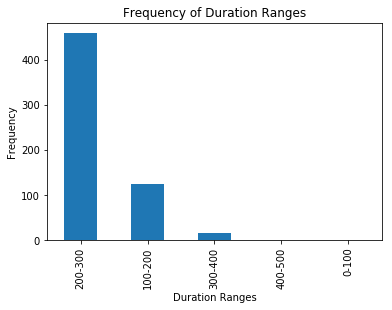

In [23]:
time_df = spotify_df
time_bins = [0, 100, 200, 300, 400, 500]
bin_names = ['0-100', '100-200', '200-300', '300-400', '400-500']
time_df['Duration Range'] = pd.cut(time_df['Duration'], time_bins, right = False, labels = bin_names)
(time_df['Duration Range'].value_counts() ** 1).plot.bar()
plt.title("Frequency of Duration Ranges")
plt.ylabel("Frequency")
plt.xlabel("Duration Ranges")

Majority of popular songs have a duration of 200-300 seconds, which is about 3-5 minutes, and the least being in the range of 0-200 seconds (0-3 minutes) and 300-500 seconds (3-8 minutes).

In [24]:
time_df.loc[time_df['Duration Range'] == '200-300'].head()

,Title,Artist,Top Genre,Year,BPM,Energy,Dance,dB,Liveness,Valence,Duration,Acoustic,Speech,Popularity,BPM Range,Energy Range,Liveness Range,Valence Range,Duration Range
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83,50-100,80-100,0-10,80-100,200-300
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82,50-100,80-100,50-60,60-80,200-300
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80,100-150,80-100,20-30,60-80,200-300
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79,100-150,80-100,0-10,60-80,200-300
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78,100-150,80-100,0-10,40-60,200-300


In [25]:
#Songs with a duration between 0 - 200 and 300-500
time_df.loc[(time_df['Duration Range'] == '400-500') | (time_df['Duration Range'] == '300-400') | (time_df['Duration Range'] == '100-200')].head()

,Title,Artist,Top Genre,Year,BPM,Energy,Dance,dB,Liveness,Valence,Duration,Acoustic,Speech,Popularity,BPM Range,Energy Range,Liveness Range,Valence Range,Duration Range
17,The Time (Dirty Bit),The Black Eyed Peas,dance pop,2010,128,81,82,-8,60,44,308,7,7,70,100-150,80-100,60-70,40-60,300-400
19,Your Love Is My Drug,Kesha,dance pop,2010,120,61,83,-4,9,76,187,1,10,69,100-150,60-80,0-10,60-80,100-200
31,My First Kiss - feat. Ke$ha,3OH!3,dance pop,2010,138,89,68,-4,36,83,192,1,8,62,100-150,80-100,30-40,80-100,100-200
32,Blah Blah Blah (feat. 3OH!3),Kesha,dance pop,2010,120,84,75,-3,42,52,172,8,12,62,100-150,80-100,40-50,40-60,100-200
35,Sexy Bitch (feat. Akon),David Guetta,dance pop,2010,130,63,81,-5,13,80,196,8,5,61,100-150,60-80,10-20,80-100,100-200


##### 8. Acoustic 
   The eighth numerical variable I will look at is acousticness. The higher the acoustic level is, the more the song is acoustic. Acoustic music is music that soley or primarily uses instruments that produce sound typically through acoustic string instruments, as opposed to electric or electronic means. Acousticness is typically found in the folk music. 

Text(0.5,0,'Acoustic Ranges')

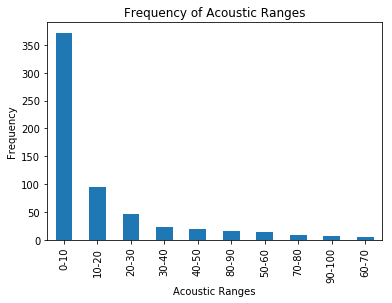

In [26]:
acoustic_df = spotify_df
acoustic_bins = [0, 10, 20, 30, 40, 50, 60, 70 , 80, 90, 100]
bin_names = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
acoustic_df['Acoustic Range'] = pd.cut(acoustic_df['Acoustic'], acoustic_bins, right = False, labels = bin_names)
(acoustic_df['Acoustic Range'].value_counts() ** 1).plot.bar()
plt.title("Frequency of Acoustic Ranges")
plt.ylabel("Frequency")
plt.xlabel("Acoustic Ranges")

Majority of popular songs have an acoustic level of 0-10, as most popular songs involve the use of electronic instrumentation. 

In [27]:
#Songs that contain an acoustic level of 0-10
acoustic_df.loc[acoustic_df['Acoustic Range'] == '0-10'].head()

,Title,Artist,Top Genre,Year,BPM,Energy,Dance,dB,Liveness,Valence,Duration,Acoustic,Speech,Popularity,BPM Range,Energy Range,Liveness Range,Valence Range,Duration Range,Acoustic Range
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79,100-150,80-100,0-10,60-80,200-300,0-10
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78,100-150,80-100,0-10,40-60,200-300,0-10
5,Baby,Justin Bieber,canadian pop,2010,65,86,73,-5,11,54,214,4,14,77,50-100,80-100,10-20,40-60,200-300,0-10
6,Dynamite,Taio Cruz,dance pop,2010,120,78,75,-4,4,82,203,0,9,77,100-150,60-80,0-10,80-100,200-300,0-10
7,Secrets,OneRepublic,dance pop,2010,148,76,52,-6,12,38,225,7,4,77,100-150,60-80,10-20,20-40,200-300,0-10


In [28]:
#Songs that contain an acoustic level of 60-70
acoustic_df.loc[acoustic_df['Acoustic Range'] == '60-70'].head()

,Title,Artist,Top Genre,Year,BPM,Energy,Dance,dB,Liveness,Valence,Duration,Acoustic,Speech,Popularity,BPM Range,Energy Range,Liveness Range,Valence Range,Duration Range,Acoustic Range
192,Atlas - From �The Hunger Games: Catching Fire�...,Coldplay,permanent wave,2013,136,45,28,-8,11,11,236,63,3,55,100-150,40-60,10-20,0-20,200-300,60-70
273,Take Me To Church,Hozier,irish singer-songwriter,2015,129,66,57,-5,12,44,242,63,5,81,100-150,60-80,10-20,40-60,200-300,60-70
411,Don't Be A Fool,Shawn Mendes,canadian pop,2016,175,34,47,-6,10,27,216,60,4,65,150-200,20-40,10-20,20-40,200-300,60-70
424,Change,Christina Aguilera,dance pop,2016,82,54,62,-6,13,20,187,68,8,54,50-100,40-60,10-20,20-40,100-200,60-70


##### 9. Speech 
   Lastly, the final numerical value I will look at is speech. The higher the value the more words the song contains. 

Text(0.5,0,'Speech Ranges')

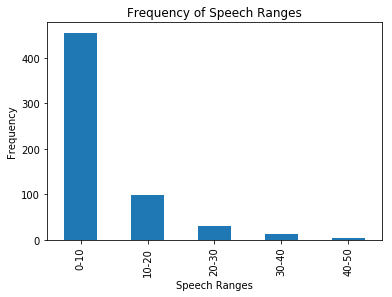

In [29]:
speech_df = spotify_df
speech_df.Speech.value_counts().sort_values()
speech_bins = [0, 10, 20, 30, 40, 50]
bin_names = ['0-10', '10-20', '20-30', '30-40', '40-50']
speech_df['Speech Range'] = pd.cut(speech_df['Speech'], speech_bins, right = False, labels = bin_names)
(speech_df['Speech Range'].value_counts() ** 1).plot.bar()
plt.title("Frequency of Speech Ranges")
plt.ylabel("Frequency")
plt.xlabel("Speech Ranges")

###### How many unique words do the songs with a Speech Range of 0-10 contain?

In [30]:
speech_df.loc[speech_df["Speech Range"] == '0-10'].head(10)

,Title,Artist,Top Genre,Year,BPM,Energy,Dance,dB,Liveness,Valence,Duration,Acoustic,Speech,Popularity,BPM Range,Energy Range,Liveness Range,Valence Range,Duration Range,Acoustic Range,Speech Range
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83,50-100,80-100,0-10,80-100,200-300,10-20,0-10
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79,100-150,80-100,0-10,60-80,200-300,0-10,0-10
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78,100-150,80-100,0-10,40-60,200-300,0-10,0-10
6,Dynamite,Taio Cruz,dance pop,2010,120,78,75,-4,4,82,203,0,9,77,100-150,60-80,0-10,80-100,200-300,0-10,0-10
7,Secrets,OneRepublic,dance pop,2010,148,76,52,-6,12,38,225,7,4,77,100-150,60-80,10-20,20-40,200-300,0-10,0-10
8,Empire State of Mind (Part II) Broken Down,Alicia Keys,hip pop,2010,93,37,48,-8,12,14,216,74,3,76,50-100,20-40,10-20,0-20,200-300,70-80,0-10
9,Only Girl (In The World),Rihanna,barbadian pop,2010,126,72,79,-4,7,61,235,13,4,73,100-150,60-80,0-10,60-80,200-300,10-20,0-10
10,Club Can't Handle Me (feat. David Guetta),Flo Rida,dance pop,2010,128,87,62,-4,6,47,235,3,3,73,100-150,80-100,0-10,40-60,200-300,0-10,0-10
11,Marry You,Bruno Mars,pop,2010,145,83,62,-5,10,48,230,33,4,73,100-150,80-100,10-20,40-60,200-300,30-40,0-10
12,Cooler Than Me - Single Mix,Mike Posner,dance pop,2010,130,82,77,-5,70,63,213,18,5,73,100-150,80-100,70-80,60-80,200-300,10-20,0-10


In [31]:
#Calculate the number of unique words in the lyrics of "Just the Way You Are"
print(len(set(bbHot.loc[bbHot['Track'] == "Just The Way You Are"].iloc[1].Lyrics.split())))

118


In [32]:
#Calculate the number of unique words in the lyrics of "Dynamite"
print(len(set(bbHot.loc[bbHot['Track'] == "Dynamite"].iloc[1].Lyrics.split())))

104


In [33]:
print(len(set(bbHot.loc[bbHot['Track'] == 'Marry You'].iloc[1].Lyrics.split())))

115


In [34]:
speech_df.loc[speech_df["Speech Range"] == '40-50'].head()

,Title,Artist,Top Genre,Year,BPM,Energy,Dance,dB,Liveness,Valence,Duration,Acoustic,Speech,Popularity,BPM Range,Energy Range,Liveness Range,Valence Range,Duration Range,Acoustic Range,Speech Range
14,Like A G6,Far East Movement,dance pop,2010,125,84,44,-8,12,78,217,1,45,72,100-150,80-100,10-20,60-80,200-300,0-10,40-50
200,How Ya Doin'? (feat. Missy Elliott),Little Mix,dance pop,2013,201,95,36,-3,37,51,211,9,48,50,200-250,80-100,30-40,40-60,200-300,0-10,40-50
266,I Luh Ya Papi,Jennifer Lopez,dance pop,2014,96,73,74,-6,12,59,207,45,42,28,50-100,60-80,10-20,40-60,200-300,40-50,40-50
271,Love Yourself,Justin Bieber,canadian pop,2015,100,38,61,-10,28,52,234,84,44,83,100-150,20-40,20-30,40-60,200-300,80-90,40-50
364,Love Yourself,Justin Bieber,canadian pop,2016,100,38,61,-10,28,52,234,84,44,83,100-150,20-40,20-30,40-60,200-300,80-90,40-50


In [35]:
#Calculate the number of unique words in the lyrics of "I Luh Ya Papi"
print(len(set(bbHot.loc[bbHot['Track'] == "I Luh Ya Papi"].iloc[1].Lyrics.split())))

247


In [36]:
print(len(set(bbHot.loc[bbHot['Track'] == "Love Yourself"].iloc[1].Lyrics.split())))

130


Generally, most popular songs have a speech range of 0-10. Therefore, the less words the song contains, the more popular the song is. 

#### Overall Observation: 
To better see the distribution of popular songs, let's graph the distribution of different features for songs to see the general trends in popular songs. As we can see, most of the popular songs contain the following characteristics on average: fast paced with a 120 BPM, energetic, danceble, shorter duration, less acoustic, and less wordy songs. 

In [93]:
spotify_df.median()

Year             2015.0
BPM               120.0
Energy             74.0
Dance              66.0
dB                 -5.0
Liveness           12.0
Valence            52.0
Duration          221.0
Acoustic            6.0
Speech              5.0
Popularity         69.0
Popular >= 50       1.0
dtype: float64

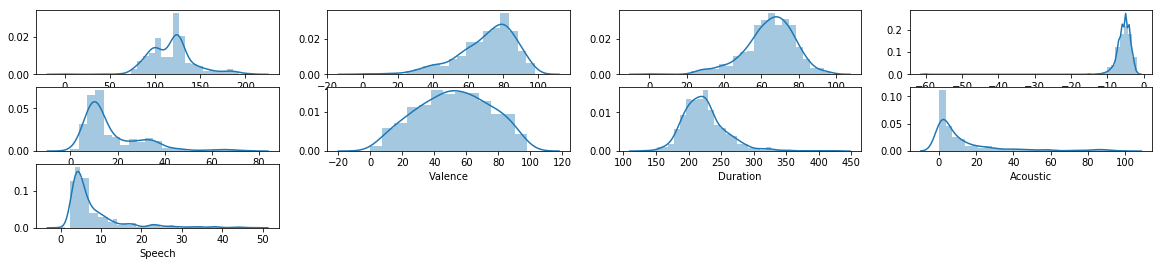

In [123]:
#Distribution plot of each song characteristic
fig, axes = plt.subplots(3, 4, figsize = (20,4), sharey = False)
sns.distplot(spotify_df['BPM'], ax = axes[0][0])
sns.distplot(spotify_df['Energy'], ax = axes[0][1])
sns.distplot(spotify_df['Dance'], ax = axes[0][2])
sns.distplot(spotify_df['dB'],ax = axes[0][3])
sns.distplot(spotify_df['Liveness'],ax = axes[1][0])
sns.distplot(spotify_df['Valence'], ax = axes[1][1])
sns.distplot(spotify_df['Duration'],ax = axes[1][2])
sns.distplot(spotify_df['Acoustic'],ax = axes[1][3])
sns.distplot(spotify_df['Speech'], ax = axes[2][0])
axes[2,1].set_axis_off()
axes[2,2].set_axis_off()
#axes[2,3].set_axis_off()

#### Question: Are male artists featured more that women in popular songs?

Next, I want to see whether gender plays a role in determination of what makes a song popular. To do this, I merged the artists' data with the top songs from Spotify by doing a left join on Spotify's data set through Artist. This will provide information on the artists' gender for each song. 

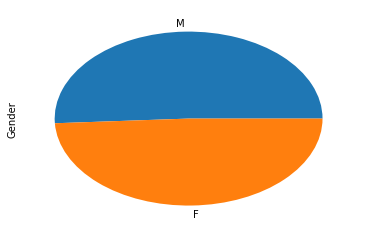

In [246]:
new_spotify = spotify_df.merge(artist_df, on=["Artist"], how="left")
new_spotify.Gender.value_counts().plot.pie()

Based on the graph above, gender is evenly distributed among popular songs with the number of males slightly more than half; therefore, gender does not appear to play a significant role in the popularity of songs. 

#### Question: What is the most prominent genre?

Next, we want to see which genre was more dominant amongst hit songs.

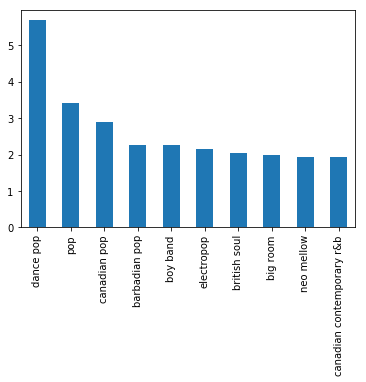

In [262]:
top_10_genres = spotify_df['Top Genre'].value_counts().head(10)
(top_10_genres ** .3).plot.bar()

Based on the graph above, we can see the most prominent genre amongst popular songs is pop music. This makes sense based on what we saw earlier with the general trends in the majority of popular songs when investigating each song attribute. 

#### Conclusion

Between the years 2010-2019, the most prominent music genre, based on Spotify's data on Billboard songs, was pop music and any subcategory of pop. 

Majority of the popular songs revealed common trends in the following song attributes: BPM, dB, duration, energy, dance, liveness, valence, acoustic, and speech, which are all provided by Spotify's data. From the data analyzed above, popular songs usually contain 120 beats per minute (BPM), an energy level of 74.0, a dancability of 66.0, a noise intensity of -5.0 dB, a liveliness of 12.0, a valence of 52.0, a duration of 3.68 minutes, an acoustic of 6.0, and a speech of 5.0.

Using this information, we can get a general idea about whether a song will become a hit or not. 